In [7]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from pymystem3 import Mystem
import string
from gensim import models, corpora
import gensim
from stop_words import get_stop_words
import nltk
from collections import Counter
from nltk.stem import *
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [49]:
with open('Downloads\data_wine.json') as json_data:
    dataset = pd.DataFrame(json.load(json_data))

In [4]:
dataset = dataset.fillna('')

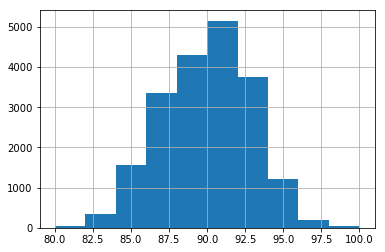

In [8]:
dataset.points = dataset.points.apply(int)
dataset.points.hist()

In [9]:
stemmer = SnowballStemmer("english")

In [12]:
stoptrans = str.maketrans('', '', string.punctuation)

In [13]:
stop_en = set(get_stop_words('en'))

In [14]:
dataset['description'] = dataset['description'].apply(lambda s: s.lower().translate(stoptrans))

In [15]:
dataset['description'] = dataset['description'].apply(lambda s: [word for word in s.split() if word not in get_stop_words('en')])

In [16]:
dataset['description'] = dataset['description'].apply(lambda s: nltk.pos_tag(s))

In [17]:
dataset['description'] = dataset['description'].apply(lambda s: [w for (w,t) in s if (t == 'JJ' or t == 'NN')])

In [18]:
dataset['description'] = dataset['description'].apply(lambda s: [stemmer.stem(w) for w in s ])

In [20]:
len(dataset)

19952

In [21]:
dictionary = corpora.Dictionary(dataset.description)

In [22]:
corpus = [dictionary.doc2bow(text) for text in dataset.description]

In [23]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [24]:
for num, words in ldamodel.print_topics(num_topics=2, num_words=20):
    print(num, ':\n' , words )

0 :
 0.042*"palat" + 0.023*"fresh" + 0.021*"finish" + 0.019*"nose" + 0.019*"acid" + 0.017*"appl" + 0.015*"fruit" + 0.015*"aroma" + 0.014*"white" + 0.012*"lemon" + 0.012*"citrus" + 0.009*"dri" + 0.009*"cherri" + 0.009*"light" + 0.009*"peach" + 0.008*"green" + 0.008*"bright" + 0.008*"wine" + 0.007*"pear" + 0.007*"note"
1 :
 0.060*"wine" + 0.024*"fruit" + 0.022*"black" + 0.020*"acid" + 0.020*"drink" + 0.018*"ripe" + 0.015*"rich" + 0.012*"spice" + 0.012*"cherri" + 0.011*"textur" + 0.011*"plum" + 0.011*"finish" + 0.011*"fruiti" + 0.010*"oak" + 0.010*"red" + 0.009*"dark" + 0.009*"full" + 0.009*"berri" + 0.008*"aroma" + 0.008*"soft"


In [25]:
def get_predict(words, model):
    words = dictionary.doc2bow(words)
    return model[words]

In [26]:
dataset['predict'] = dataset.description.apply(lambda s: get_predict(s, ldamodel))

In [27]:
def get_num(res):
    p0 = res[0][1]
    p1 = res[1][1]
    if p0 > p1:
        return 0
    else:
        return 1

In [28]:
dataset['ans'] = dataset.predict.apply(get_num)

In [35]:
class0 = dataset[dataset.ans == 0]
class1 = dataset[dataset.ans == 1]
len(class0), len(class1)

(8025, 11927)

In [36]:
with open('red-varieties.txt') as f:
    red = f.read().lower()
    
with open('white-varieties.txt') as f:
    white = f.read().lower()    

In [37]:
var_color = dict()

for var in set(dataset.variety.tolist()):
    if var.lower() in red:
        var_color[var] = 'red'
    elif var.lower() in white:
        var_color[var] = 'white'

In [38]:
dataset['color'] = dataset.variety.apply(lambda s: var_color.get(s, '?'))

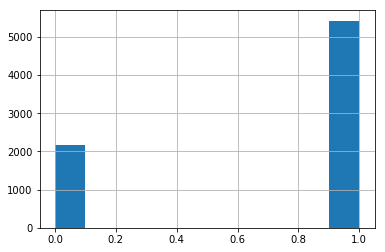

In [47]:
dataset[dataset.color == 'red'].ans.hist()

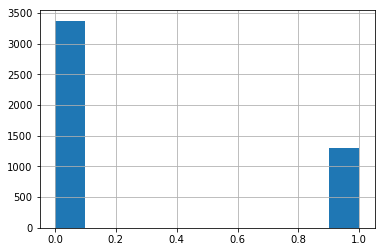

In [48]:
dataset[dataset.color == 'white'].ans.hist()